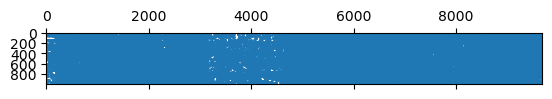

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict


in_file = open('nlp_out_0.txt', 'r')

# def form_dict(jap_tocs):
#     freq = defaultdict(int)
#     for tok in jap_tocs:
#         freq[tok] += 1
#     return freq

def parse_line(line):
    split_line = line.split('|')
    line_id = int(split_line[0])
    year = int(split_line[1])
    jap = split_line[2]
    
    # freq = form_dict(jap)

    return line_id, year, jap

ids = []
years = []
dicts = []

for line in in_file:
    line_id, year, freq = parse_line(line)
    ids.append(line_id)
    years.append(year)
    dicts.append(freq)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dicts)


# X
import matplotlib.pyplot as plt
plt.spy(X, markersize= 1)

